In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/histan/Desktop/NTU AI Program/AI Lab/Lesson6 20210810/Bond Index.csv")

In [2]:
df.iloc[:,0]=pd.to_numeric(df.iloc[:,0], errors="coerce")

In [3]:
df = df.interpolate()

In [4]:
print(df)

       Bond Index
0     2586.250000
1     2589.556667
2     2592.863333
3     2596.170000
4     2595.205000
...           ...
1318  3543.660000
1319  3550.190000
1320  3534.570000
1321  3534.480000
1322  3546.640000

[1323 rows x 1 columns]


In [5]:
n_row=len(df)
train_row = int(0.8 * n_row)
train = df[0:train_row]
test = df[train_row:]

In [6]:
print(train,test)

       Bond Index
0     2586.250000
1     2589.556667
2     2592.863333
3     2596.170000
4     2595.205000
...           ...
1053  3238.780000
1054  3238.490000
1055  3238.820000
1056  3224.510000
1057  3249.290000

[1058 rows x 1 columns]       Bond Index
1058     3237.63
1059     3238.00
1060     3233.16
1061     3238.88
1062     3240.98
...          ...
1318     3543.66
1319     3550.19
1320     3534.57
1321     3534.48
1322     3546.64

[265 rows x 1 columns]


<AxesSubplot:>

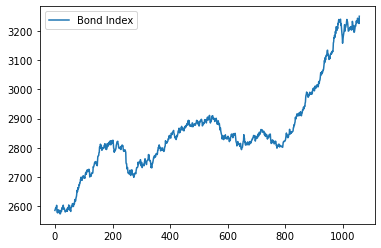

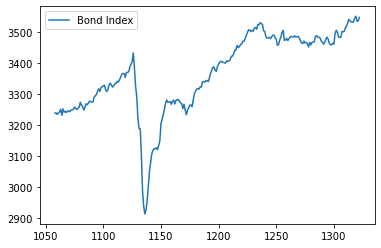

In [7]:
train.plot()
test.plot()

In [8]:
from statsmodels.tsa.stattools import adfuller

dicky = adfuller(df)
print(dicky[1])

0.9551229511447361


In [9]:
from sklearn.metrics import mean_squared_error

pred = test.copy()
pred['MA'] = train.iloc[:,0].rolling(60).mean().iloc[-1]

In [10]:
mean_squared_error(pred['MA'],test["Bond Index"])**0.5

199.11464287430064

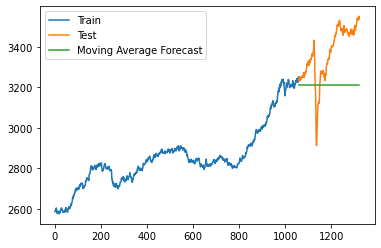

In [11]:
import matplotlib.pyplot as plt 

plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred['MA'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [12]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import numpy as np

pred = test.copy()
model = SimpleExpSmoothing(np.asarray(train.iloc[:,0])).fit(smoothing_level=0.6) 
#0.6 is for y(t) and 0.4 is for y(t-1 and below)
pred['ES'] = model.forecast(len(test))

C:\Users\histan\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [13]:
mean_squared_error(pred['ES'],test["Bond Index"])**0.5

178.14364086577876

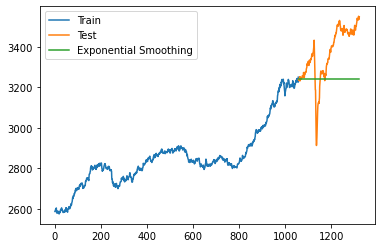

In [14]:
import matplotlib.pyplot as plt 

plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred['ES'], label='Exponential Smoothing')
plt.legend(loc='best')
plt.show()

In [15]:
pred = test.copy()

#0.3 is for y(t) and 0.7 is for y(t-1 and below, slope/gradient =0.1)
model = Holt(np.asarray(train.iloc[:,0])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)  
pred['Holt'] = model.forecast(len(test))
mean_squared_error(pred['Holt'],test["Bond Index"])**0.5

C:\Users\histan\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-15-4bf24234de89>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model = Holt(np.asarray(train.iloc[:,0])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)


122.88063634941822

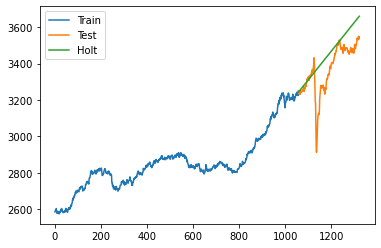

In [17]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred['Holt'], label='Holt')
plt.legend(loc='best')
plt.show()

In [19]:
pred = test.copy()
model = ExponentialSmoothing(train, trend='add').fit()
pred['Holt_Winter'] = model.forecast(len(test))
mean_squared_error(pred['Holt_Winter'],test["Bond Index"])**0.5

C:\Users\histan\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


98.72404667634355

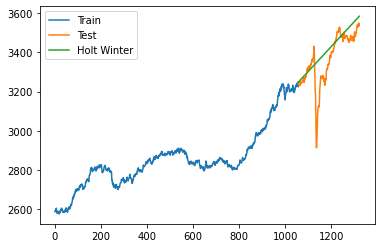

In [20]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred['Holt_Winter'], label='Holt Winter')
plt.legend(loc='best')
plt.show()

In [21]:
import statsmodels.api as sm

pred = test.copy()
model = sm.tsa.statespace.SARIMAX(train.iloc[:,0], order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()

pred['SARIMA'] = model.forecast(len(test))
mean_squared_error(pred['SARIMA'],test["Bond Index"])**0.5

C:\Users\histan\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


102.63725762143964

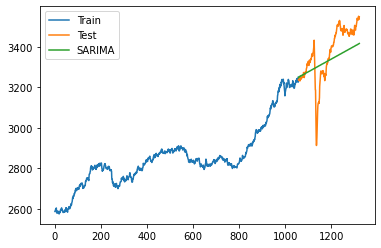

In [22]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(pred['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [23]:
#decompose

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(train, model='additive', freq=2)
trend = decomposition.trend.dropna()
seasonal=decomposition.seasonal.dropna()
residual=decomposition.resid.dropna()

<ipython-input-23-4b19ce635fd9>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(train, model='additive', freq=2)


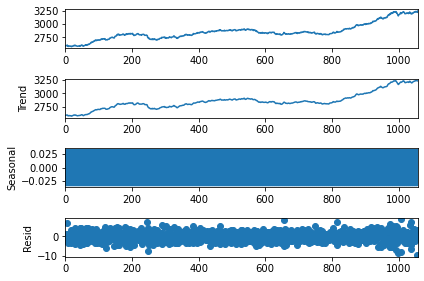

In [24]:
decomposition.plot()
plt.show()

In [25]:
# check dicky fuller on the residual

print(residual)
result = adfuller(residual)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1]) # p vlaue > 0.05 means there non-stationary, need to use non stationary model

1      -0.032875
2       0.032875
3       1.035042
4       0.032875
5      -2.654125
          ...   
1052   -0.734625
1053   -0.032875
1054   -0.122125
1055    3.627125
1056   -9.739625
Name: resid, Length: 1056, dtype: float64
ADF Statistic: -12.328236
p-value: 0.000000


In [26]:
#Without Customization (On Test Set) Additive
pred =  trend + seasonal + residual

pred = pred.dropna()[-len(test):]

print(pred)
print(test)
mean_squared_error(pred, test["Bond Index"])**0.5

792     2810.39
793     2819.57
794     2819.89
795     2820.17
796     2823.24
         ...   
1052    3239.07
1053    3238.78
1054    3238.49
1055    3238.82
1056    3224.51
Length: 265, dtype: float64
      Bond Index
1058     3237.63
1059     3238.00
1060     3233.16
1061     3238.88
1062     3240.98
...          ...
1318     3543.66
1319     3550.19
1320     3534.57
1321     3534.48
1322     3546.64

[265 rows x 1 columns]


326.0033236780738

In [27]:
#Without Customization (On Test Set) Additive
pred =  1.1*trend + 1.1*seasonal + 1.1*residual

pred = pred.dropna()[-len(test):]

print(pred)
print(test)
mean_squared_error(pred, test["Bond Index"])**0.5

792     3091.429
793     3101.527
794     3101.879
795     3102.187
796     3105.564
          ...   
1052    3562.977
1053    3562.658
1054    3562.339
1055    3562.702
1056    3546.961
Length: 265, dtype: float64
      Bond Index
1058     3237.63
1059     3238.00
1060     3233.16
1061     3238.88
1062     3240.98
...          ...
1318     3543.66
1319     3550.19
1320     3534.57
1321     3534.48
1322     3546.64

[265 rows x 1 columns]


99.74001829129153

In [28]:
decomposition = seasonal_decompose(train, model='multiplicative', freq=2)
trend = decomposition.trend.dropna()
seasonal=decomposition.seasonal.dropna()
residual=decomposition.resid.dropna()

#Without Customization (On Test Set) Additive
pred =  1.1*trend*seasonal*residual

pred = pred.dropna()[-len(test):]

mean_squared_error(pred, test["Bond Index"])**0.5

<ipython-input-28-ad80ce32d078>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(train, model='multiplicative', freq=2)


99.74001829129155